In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

sns.set(rc={'figure.figsize':(12,10)})

# data loading

In [3]:
data= pd.read_csv('titanic_data.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### types of features
###### categorical - sex,embarked
###### continuous - age,fare
###### discrete - sibsp, parch 
###### alphanumeric - cabin

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


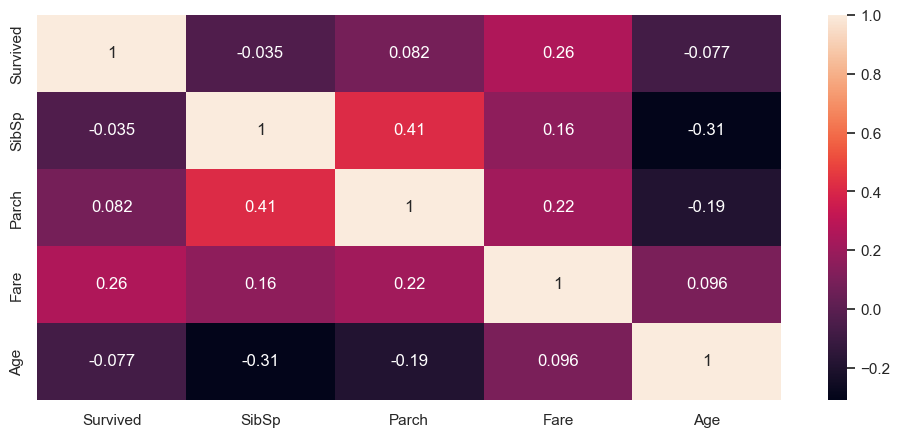

In [8]:
plt.figure(figsize=(12,5))# 12 is column width and 5 is row length
heatmap= sns.heatmap(data[["Survived", "SibSp", "Parch", "Fare", "Age"]].corr(), annot= True)# corr is used for comparing with itself

In [9]:
data['SibSp'].nunique()

7

In [10]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

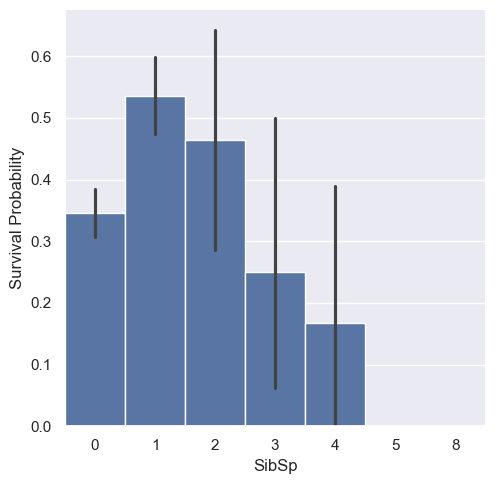

In [11]:
sns.catplot(x="SibSp", y="Survived",data=data, kind="bar",width = 1 ).set_ylabels("Survival Probability") #size is width of bar and set_ylabels is used for changing the label from the data provided

# Survival prob by AGE

C:\Users\KUMAR GAURAV PRAKASH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\KUMAR GAURAV PRAKASH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


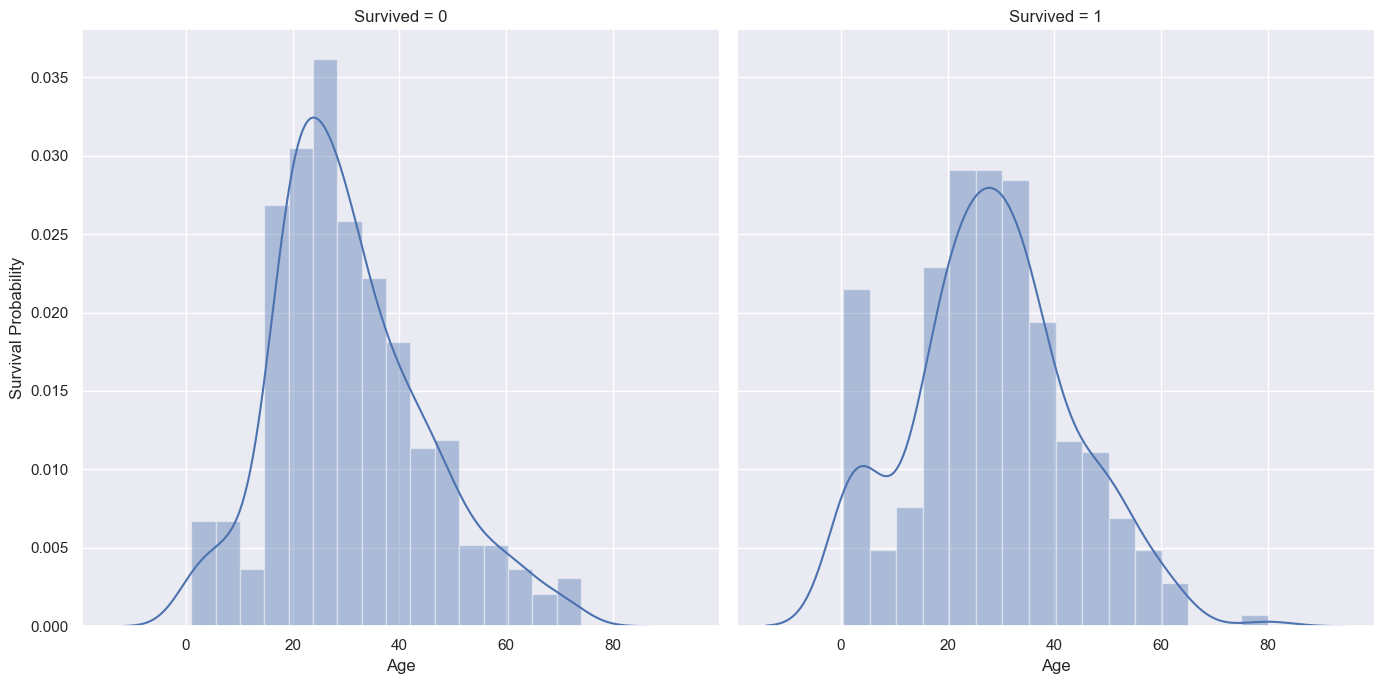

In [13]:
age_visual=sns.FacetGrid(data, col="Survived",height=7 )
age_visual=age_visual.map(sns.distplot, "Age").set_ylabels("Survival Probability")

# SEX

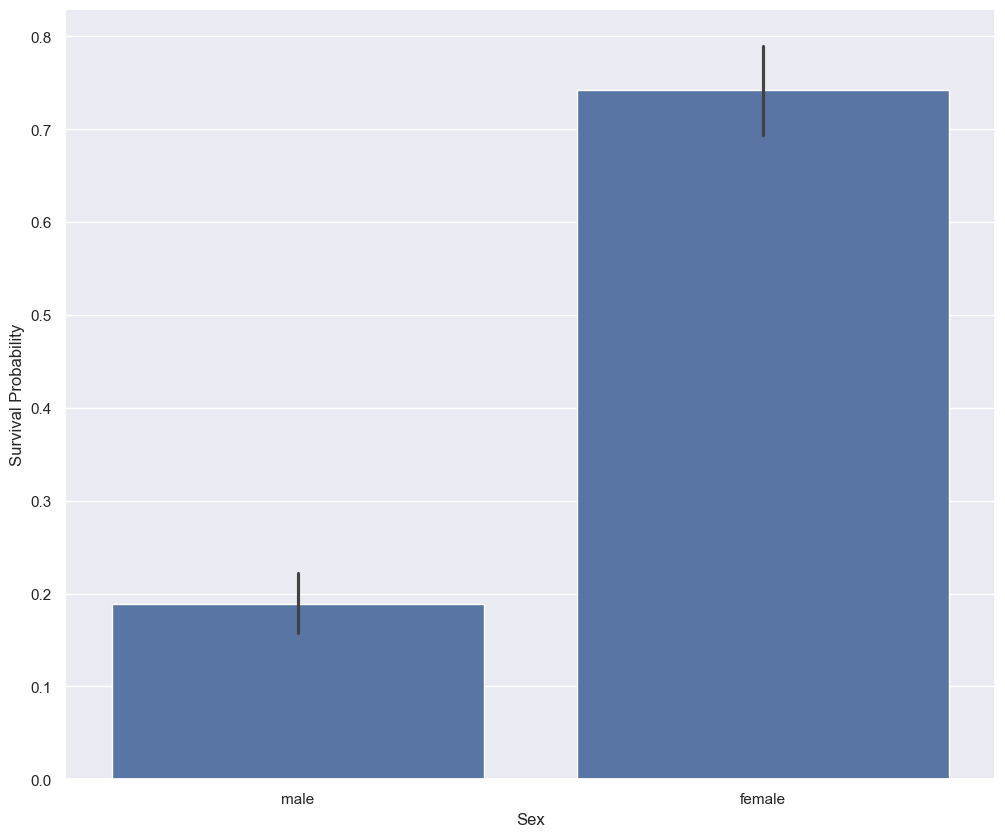

In [15]:
age_visual=sns.barplot(x= "Sex", y="Survived", data=data).set_ylabel("Survival Probability")# barplot in disrete/binary  and facet in continous data, ylabel in barplot, lables in facet

In [16]:
data[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


# By Pclass

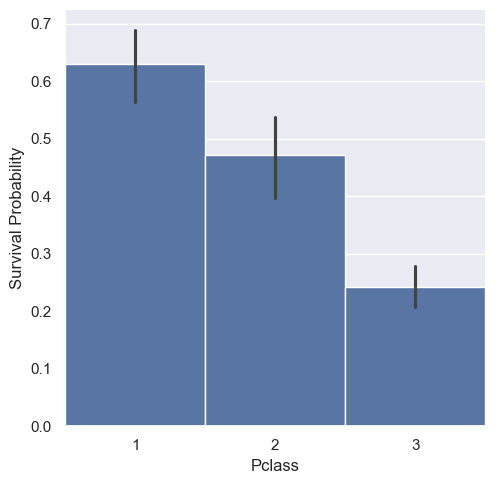

In [18]:
pclass=sns.catplot(x="Pclass", y="Survived",data=data, kind="bar",width = 1 ).set_ylabels("Survival Probability")

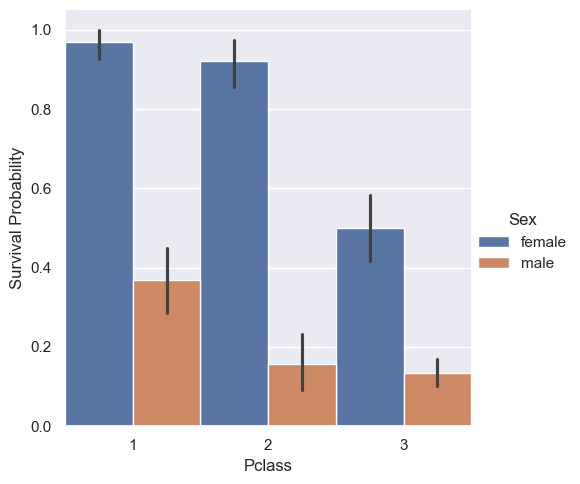

In [19]:
pclass=sns.catplot(x="Pclass", y="Survived",data=data, kind="bar",width = 1 , hue="Sex").set_ylabels("Survival Probability")

# Embarked

In [21]:
data["Embarked"].isnull().sum()

2

In [22]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [23]:
data["Embarked"]=data["Embarked"].fillna("S")

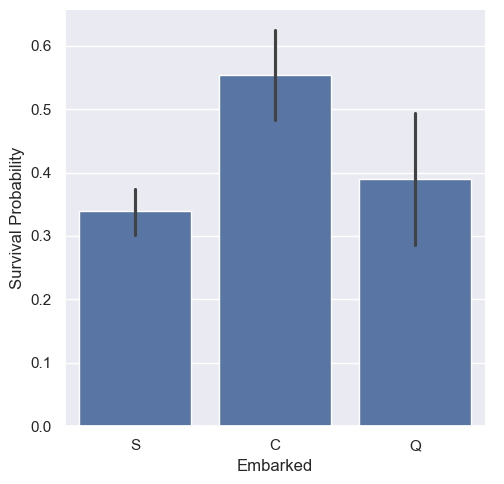

In [24]:
#explore pclass vs embarked
g=sns.catplot(x="Embarked", y="Survived",data=data, kind="bar" ).set_ylabels("Survival Probability")

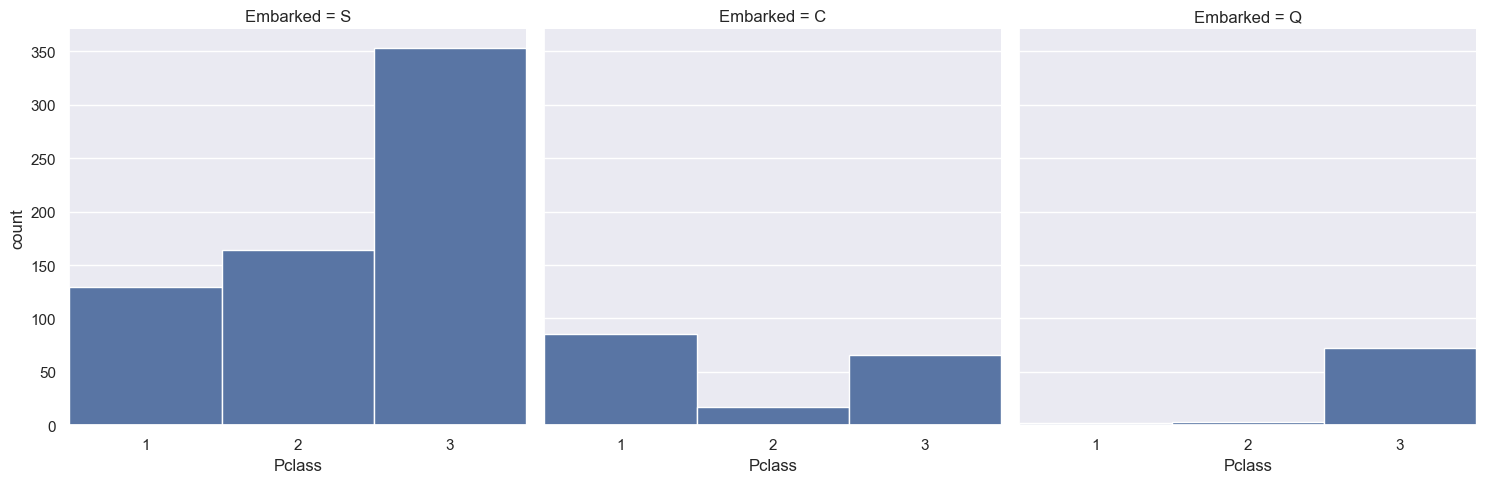

In [25]:
pclass=sns.catplot(x="Pclass", col="Embarked",data=data, kind="count",width = 1 )
g.despine(left=True)
g=g.set_ylabels("Count")

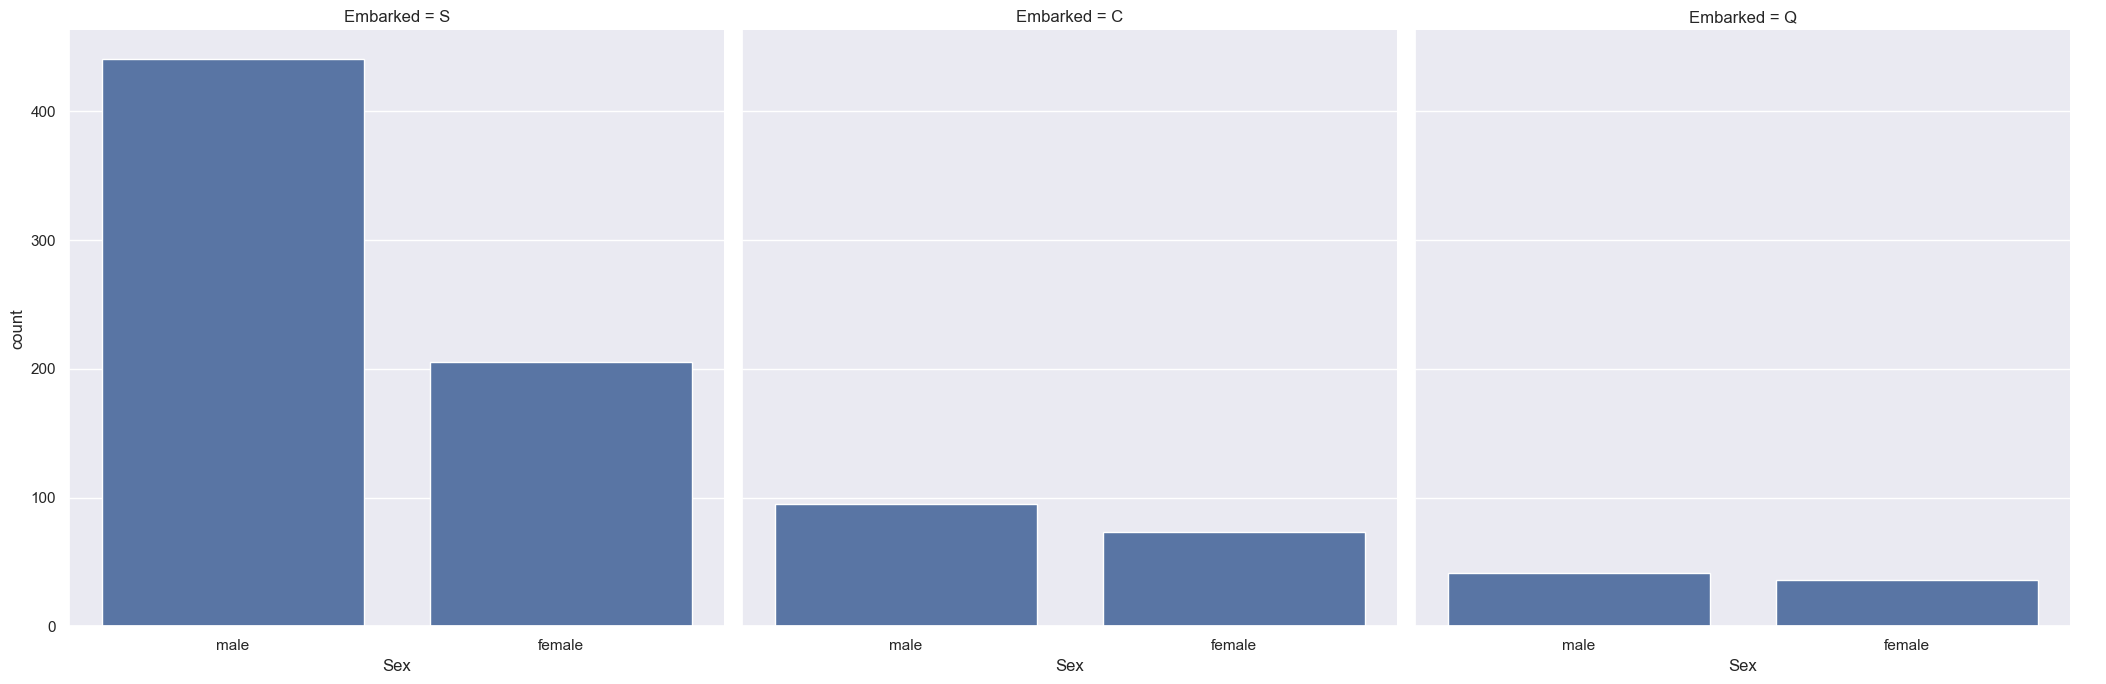

In [26]:
g=sns.catplot(x="Sex", col="Embarked", data=data, height=7, kind="count")

we can see from the above analysis that Southamtop has more male passengers and even they are from Pclass = 3 hence there survival chances are very less compared to C

# Data preparing

In [29]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
mean=data['Age'].mean()
std=data['Age'].std()

is_null= data['Age'].isnull().sum()

In [32]:
print(mean, std, is_null)

29.69911764705882 14.526497332334044 177


In [33]:
rand_age=np.random.randint(mean-std, mean+std, size=is_null.sum())

In [34]:
rand_age

array([41, 38, 20, 26, 15, 16, 28, 37, 24, 16, 28, 28, 40, 38, 28, 16, 37,
       21, 18, 39, 30, 24, 40, 16, 19, 33, 18, 39, 39, 33, 28, 22, 40, 34,
       17, 15, 26, 22, 15, 26, 28, 16, 40, 32, 33, 18, 22, 31, 21, 32, 20,
       28, 17, 21, 39, 42, 29, 38, 16, 22, 34, 38, 42, 22, 24, 16, 38, 40,
       32, 41, 25, 40, 25, 30, 32, 29, 25, 17, 37, 40, 42, 17, 18, 36, 22,
       39, 21, 26, 40, 33, 18, 24, 27, 23, 27, 23, 16, 25, 43, 24, 18, 15,
       25, 41, 17, 41, 26, 29, 36, 18, 31, 43, 36, 36, 30, 28, 30, 41, 30,
       30, 31, 21, 33, 15, 25, 28, 32, 35, 35, 35, 21, 41, 31, 25, 24, 16,
       18, 22, 39, 29, 23, 22, 15, 28, 34, 19, 16, 34, 16, 29, 18, 19, 31,
       26, 40, 17, 18, 19, 16, 26, 24, 38, 21, 31, 38, 27, 39, 31, 25, 32,
       29, 33, 19, 39, 27, 25, 30])

In [35]:
type(rand_age)

numpy.ndarray

In [36]:
a= data['Age'].copy()

In [37]:
np.isnan(a) #returns tryue where value is null

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [38]:
a[np.isnan(a)] #all indices where value is null

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [39]:
a[np.isnan(a)] = rand_age #assigns all null a random age value

In [40]:
data['Age']=a
data['Age'].isnull().sum()

0

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


we have already filled na values of embarked as s

In [43]:
col_to_drop=['PassengerId', 'Cabin', 'Ticket','Name']
data.drop(col_to_drop, axis = 1, inplace =True)# drops columns
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,41.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [44]:
genders={"male":0, "female":1}
data['Sex']=data['Sex'].map(genders)

In [45]:
ports={"S":0, "C":1,"Q":2}
data['Embarked']=data['Embarked'].map(ports)

In [46]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Splitting the data

In [48]:
x=data.drop(data.columns[[0]], axis=1)
y=data['Survived']

In [49]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain, ytest= train_test_split(x,y,test_size=0.30, random_state=0)

# Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.transform(xtest)

# Classification

In [53]:
logreg=LogisticRegression()
svc_classifier=SVC()
dt_classifier=DecisionTreeClassifier()
knn_classifier=KNeighborsClassifier(5)
rf_classifier=RandomForestClassifier(n_estimators=1000)

In [54]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=1000)

In [55]:
logreg_ypred=logreg.predict(xtest)
svc_classifier_ypred=svc_classifier.predict(xtest)
dt_classifier_ypred=dt_classifier.predict(xtest)
knn_classifier_ypred=knn_classifier.predict(xtest)
rf_classifier_ypred=rf_classifier.predict(xtest)


In [56]:
from sklearn.metrics import accuracy_score

logreg_acc= accuracy_score(ytest, logreg_ypred)
svc_classifier_acc= accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc= accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc= accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc= accuracy_score(ytest, rf_classifier_ypred)

In [57]:
print("Logistic Regression :", round(logreg_acc*100,2))
print("Support_vector      :", round(svc_classifier_acc*100,2))
print("Decision tree      :", round(dt_classifier_acc*100,2))
print("K-NN Classifier      :", round(knn_classifier_acc*100,2))
print("Random Forest      :", round(rf_classifier_acc*100,2))

Logistic Regression : 80.22
Support_vector      : 81.72
Decision tree      : 76.49
K-NN Classifier      : 83.96
Random Forest      : 80.97
